<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IEEE-CIS-Fraud-Detection" data-toc-modified-id="IEEE-CIS-Fraud-Detection-1">IEEE-CIS Fraud Detection</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Reading-in-and-merging-dataframes" data-toc-modified-id="Reading-in-and-merging-dataframes-1.2">Reading in and merging dataframes</a></span></li><li><span><a href="#Data-exploration-and-preprocessing" data-toc-modified-id="Data-exploration-and-preprocessing-1.3">Data exploration and preprocessing</a></span></li><li><span><a href="#Creating-simplified-data-sets-for--experimentation" data-toc-modified-id="Creating-simplified-data-sets-for--experimentation-1.4">Creating simplified data sets for  experimentation</a></span><ul class="toc-item"><li><span><a href="#Random-sampling-of-the-test-set" data-toc-modified-id="Random-sampling-of-the-test-set-1.4.1">Random sampling of the test set</a></span></li><li><span><a href="#Simplfication-of-data-set" data-toc-modified-id="Simplfication-of-data-set-1.4.2">Simplfication of data set</a></span></li></ul></li></ul></li></ul></div>

# IEEE-CIS Fraud Detection

## Imports

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [48]:
import sys
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
import multiprocessing as mp
import torch
import datetime
from functools import partial
from matplotlib import pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = 200

In [6]:
path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')

In [7]:
Path.BASE_PATH = path

In [5]:
# with ZipFile('ieee-fraud-detection.zip', 'r') as zip_ref:
#     zip_ref.extractall(path/'Data')

## Reading in and merging dataframes

In [6]:
files = [path/'test_identity.csv', 
         path/'test_transaction.csv',
         path/'train_identity.csv',
         path/'train_transaction.csv']

In [ ]:
%%time
def read_data(file):
    return pd.read_csv(file, low_memory=False)

with mp.Pool() as pool:
    test_id, test_tr, train_id, train_tr = pool.map(read_data, files)   

In [ ]:
train = pd.merge(train_tr, train_id, on='TransactionID', how='left')
test = pd.merge(test_tr, test_id, on='TransactionID', how='left')

In [ ]:
train.to_csv(path/'train.csv')
test.to_csv(path/'test.csv')

In [64]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)
test = pd.read_csv(path/'test.csv', index_col=[0], low_memory=False)

## Data exploration and preprocessing

In [9]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 590540 rows and 434 columns.
Test dataset has 506691 rows and 433 columns.


In [18]:
def nans_by_col(df):
    p_nan = {}
    print('--Lengths--' + '--NaN Counts--' + '--Percent NaN--')
    for col in df.columns:
        nan_count = len(df[col]) - df[col].count()
        length = len(df[col])
        percent_nan = nan_count/length
        p_nan[col] = percent_nan
        print(f'{col}: {length},     {nan_count},     {percent_nan}')
    return p_nan

In [19]:
p_nan_train = nans_by_col(train)

--Lengths----NaN Counts----Percent NaN--
TransactionID: 590540,     0,     0.0
isFraud: 590540,     0,     0.0
TransactionDT: 590540,     0,     0.0
TransactionAmt: 590540,     0,     0.0
ProductCD: 590540,     0,     0.0
card1: 590540,     0,     0.0
card2: 590540,     8933,     0.015126833068039422
card3: 590540,     1565,     0.0026501168422122124
card4: 590540,     1577,     0.00267043722694483
card5: 590540,     4259,     0.007212043214684865
card6: 590540,     1571,     0.0026602770345785214
addr1: 590540,     65706,     0.1112642666034477
addr2: 590540,     65706,     0.1112642666034477
dist1: 590540,     352271,     0.596523520845328
dist2: 590540,     552913,     0.9362837403054831
P_emaildomain: 590540,     94456,     0.1599485216920107
R_emaildomain: 590540,     453249,     0.7675161716395164
C1: 590540,     0,     0.0
C2: 590540,     0,     0.0
C3: 590540,     0,     0.0
C4: 590540,     0,     0.0
C5: 590540,     0,     0.0
C6: 590540,     0,     0.0
C7: 590540,     0,     

V141: 590540,     508595,     0.8612371727571375
V142: 590540,     508595,     0.8612371727571375
V143: 590540,     508589,     0.8612270125647712
V144: 590540,     508589,     0.8612270125647712
V145: 590540,     508589,     0.8612270125647712
V146: 590540,     508595,     0.8612371727571375
V147: 590540,     508595,     0.8612371727571375
V148: 590540,     508595,     0.8612371727571375
V149: 590540,     508595,     0.8612371727571375
V150: 590540,     508589,     0.8612270125647712
V151: 590540,     508589,     0.8612270125647712
V152: 590540,     508589,     0.8612270125647712
V153: 590540,     508595,     0.8612371727571375
V154: 590540,     508595,     0.8612371727571375
V155: 590540,     508595,     0.8612371727571375
V156: 590540,     508595,     0.8612371727571375
V157: 590540,     508595,     0.8612371727571375
V158: 590540,     508595,     0.8612371727571375
V159: 590540,     508589,     0.8612270125647712
V160: 590540,     508589,     0.8612270125647712
V161: 590540,     50

V310: 590540,     12,     2.0320384732617603e-05
V311: 590540,     12,     2.0320384732617603e-05
V312: 590540,     12,     2.0320384732617603e-05
V313: 590540,     1269,     0.0021488806854743116
V314: 590540,     1269,     0.0021488806854743116
V315: 590540,     1269,     0.0021488806854743116
V316: 590540,     12,     2.0320384732617603e-05
V317: 590540,     12,     2.0320384732617603e-05
V318: 590540,     12,     2.0320384732617603e-05
V319: 590540,     12,     2.0320384732617603e-05
V320: 590540,     12,     2.0320384732617603e-05
V321: 590540,     12,     2.0320384732617603e-05
V322: 590540,     508189,     0.8605496664070174
V323: 590540,     508189,     0.8605496664070174
V324: 590540,     508189,     0.8605496664070174
V325: 590540,     508189,     0.8605496664070174
V326: 590540,     508189,     0.8605496664070174
V327: 590540,     508189,     0.8605496664070174
V328: 590540,     508189,     0.8605496664070174
V329: 590540,     508189,     0.8605496664070174
V330: 590540,    

In [20]:
p_nan_test = nans_by_col(test)

--Lengths----NaN Counts----Percent NaN--
TransactionID: 506691,     0,     0.0
TransactionDT: 506691,     0,     0.0
TransactionAmt: 506691,     0,     0.0
ProductCD: 506691,     0,     0.0
card1: 506691,     0,     0.0
card2: 506691,     8654,     0.017079442895176745
card3: 506691,     3002,     0.0059247154577444635
card4: 506691,     3086,     0.006090496969553436
card5: 506691,     4547,     0.008973911121373777
card6: 506691,     3007,     0.00593458340487595
addr1: 506691,     65609,     0.1294852286699389
addr2: 506691,     65609,     0.1294852286699389
dist1: 506691,     291217,     0.5747427919580178
dist2: 506691,     470255,     0.9280902956634319
P_emaildomain: 506691,     69192,     0.13655659958436206
R_emaildomain: 506691,     370821,     0.7318484046489873
C1: 506691,     3,     5.920768278891869e-06
C2: 506691,     3,     5.920768278891869e-06
C3: 506691,     3,     5.920768278891869e-06
C4: 506691,     3,     5.920768278891869e-06
C5: 506691,     3,     5.92076827889

V142: 506691,     430906,     0.8504315253280599
V143: 506691,     430636,     0.8498986561829597
V144: 506691,     430636,     0.8498986561829597
V145: 506691,     430636,     0.8498986561829597
V146: 506691,     430906,     0.8504315253280599
V147: 506691,     430906,     0.8504315253280599
V148: 506691,     430906,     0.8504315253280599
V149: 506691,     430906,     0.8504315253280599
V150: 506691,     430636,     0.8498986561829597
V151: 506691,     430636,     0.8498986561829597
V152: 506691,     430636,     0.8498986561829597
V153: 506691,     430906,     0.8504315253280599
V154: 506691,     430906,     0.8504315253280599
V155: 506691,     430906,     0.8504315253280599
V156: 506691,     430906,     0.8504315253280599
V157: 506691,     430906,     0.8504315253280599
V158: 506691,     430906,     0.8504315253280599
V159: 506691,     430636,     0.8498986561829597
V160: 506691,     430636,     0.8498986561829597
V161: 506691,     430906,     0.8504315253280599
V162: 506691,     43

V322: 506691,     430260,     0.8491565865586719
V323: 506691,     430260,     0.8491565865586719
V324: 506691,     430260,     0.8491565865586719
V325: 506691,     430260,     0.8491565865586719
V326: 506691,     430260,     0.8491565865586719
V327: 506691,     430260,     0.8491565865586719
V328: 506691,     430260,     0.8491565865586719
V329: 506691,     430260,     0.8491565865586719
V330: 506691,     430260,     0.8491565865586719
V331: 506691,     430260,     0.8491565865586719
V332: 506691,     430260,     0.8491565865586719
V333: 506691,     430260,     0.8491565865586719
V334: 506691,     430260,     0.8491565865586719
V335: 506691,     430260,     0.8491565865586719
V336: 506691,     430260,     0.8491565865586719
V337: 506691,     430260,     0.8491565865586719
V338: 506691,     430260,     0.8491565865586719
V339: 506691,     430260,     0.8491565865586719
id-01: 506691,     364784,     0.7199338452824305
id-02: 506691,     369715,     0.7296656147435024
id-03: 506691,    

In [36]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

<AxesSubplot:xlabel='isFraud', ylabel='Value counts'>

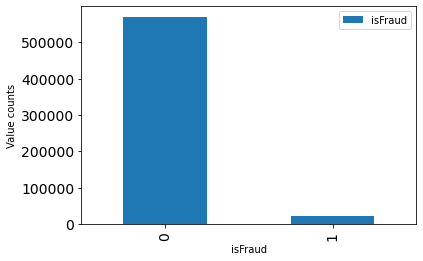

In [16]:
train['isFraud'].value_counts().plot.bar(xlabel='isFraud', ylabel='Value counts', 
                                         fontsize=14, legend=True)

In [67]:
train['isFraud']

0         0
1         0
2         0
3         0
4         0
         ..
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int64

In [65]:
train['isFraud'].mean()

0.03499000914417313

This indicates that there is class imbalance of about 1 to 30. 

In [68]:
train_fraud = train['isFraud']==1
train_fraud

0         False
1         False
2         False
3         False
4         False
          ...  
590535    False
590536    False
590537    False
590538    False
590539    False
Name: isFraud, Length: 590540, dtype: bool

In [72]:
train_no_fraud = train[train['isFraud']==0]
train_fraud = train[train['isFraud']==1]

In [116]:
def value_counts_by_fraud_status(column, nrows, ncols, **kwargs):
    figure, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplot(nrows, ncols, 1)
    plt.title('Not Fraud')
    train_no_fraud[column].value_counts(normalize=True).plot.bar(**kwargs)
    plt.subplot(nrows, ncols, 2)
    plt.title('Fraud')
    train_fraud[column].value_counts(normalize=True).plot.bar(**kwargs)

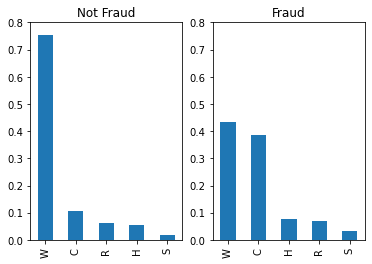

In [117]:
value_counts_by_fraud_status('ProductCD', nrows=1, ncols=2, ylim=(0,0.8))

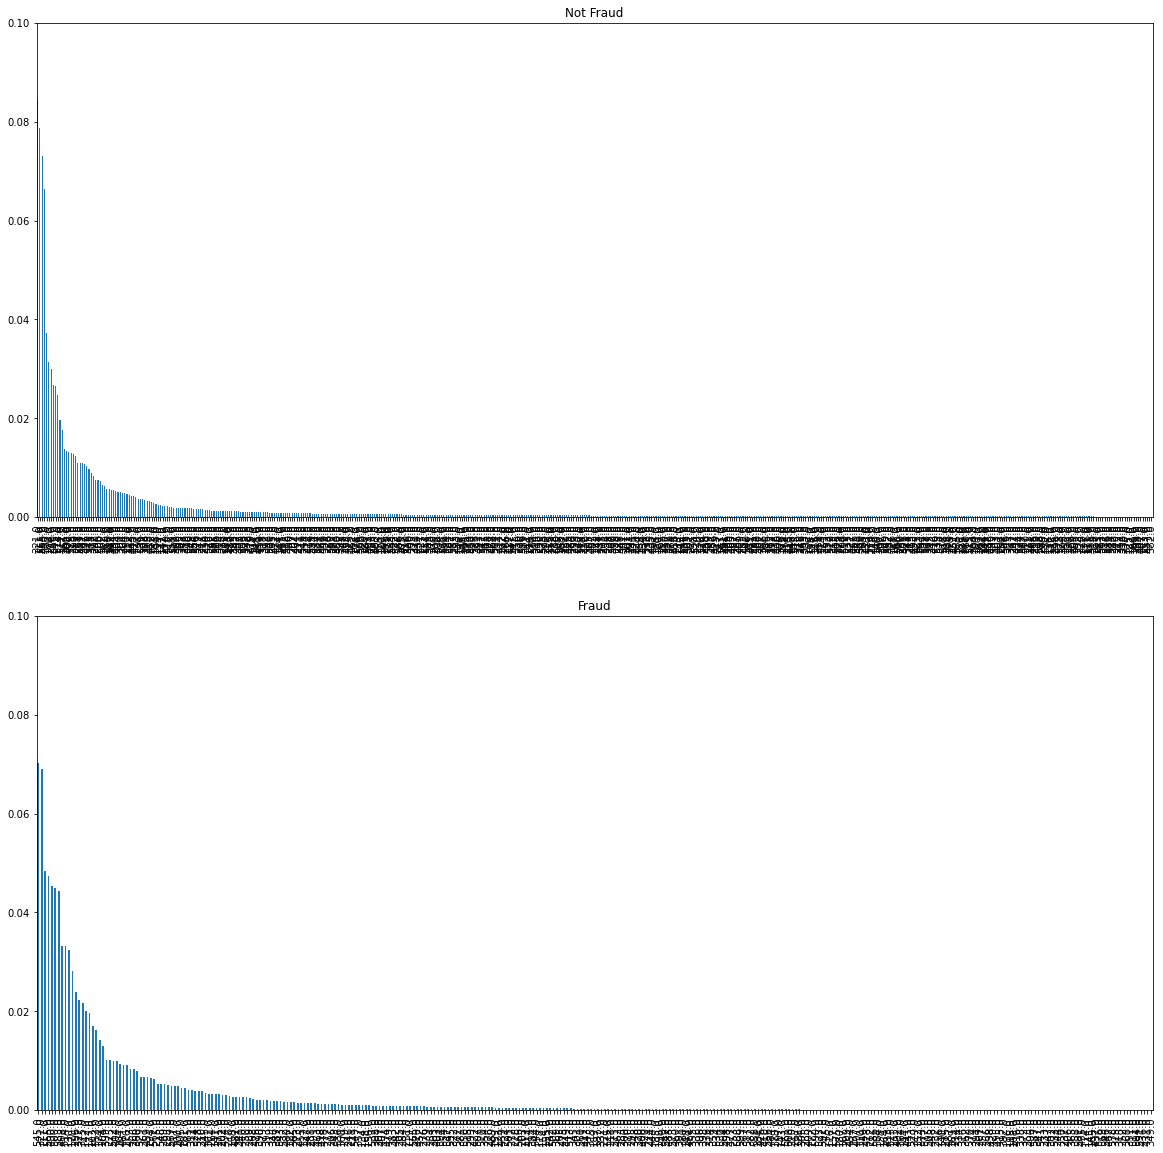

In [118]:
value_counts_by_fraud_status('card2', nrows=2, ncols=1, ylim=(0,0.1), figsize=(20,20))

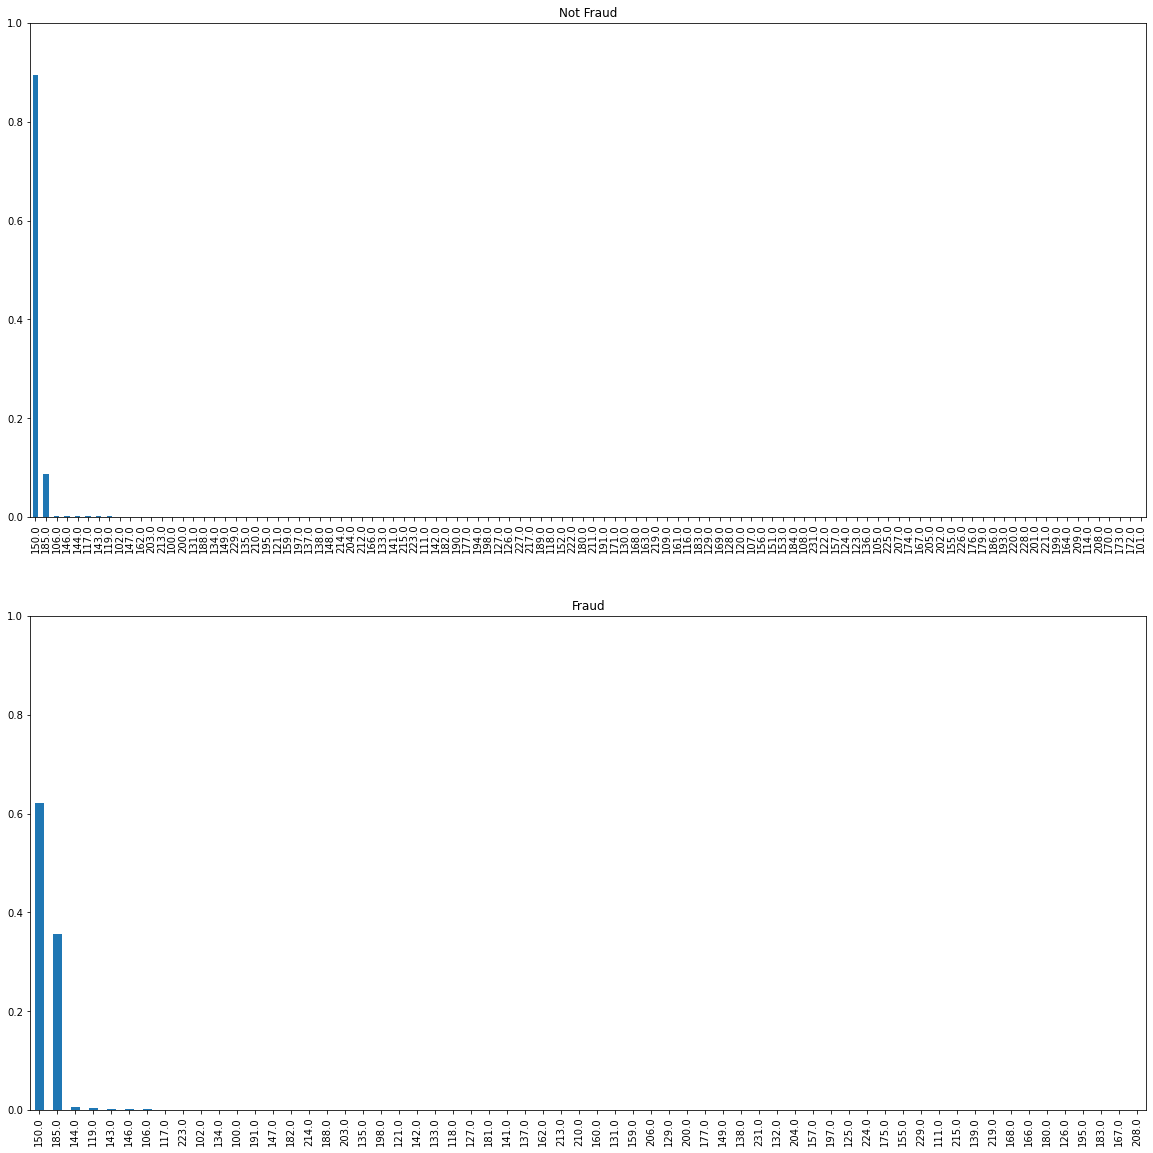

In [119]:
value_counts_by_fraud_status('card3', nrows=2, ncols=1, ylim=(0, 1), figsize=(20,20))

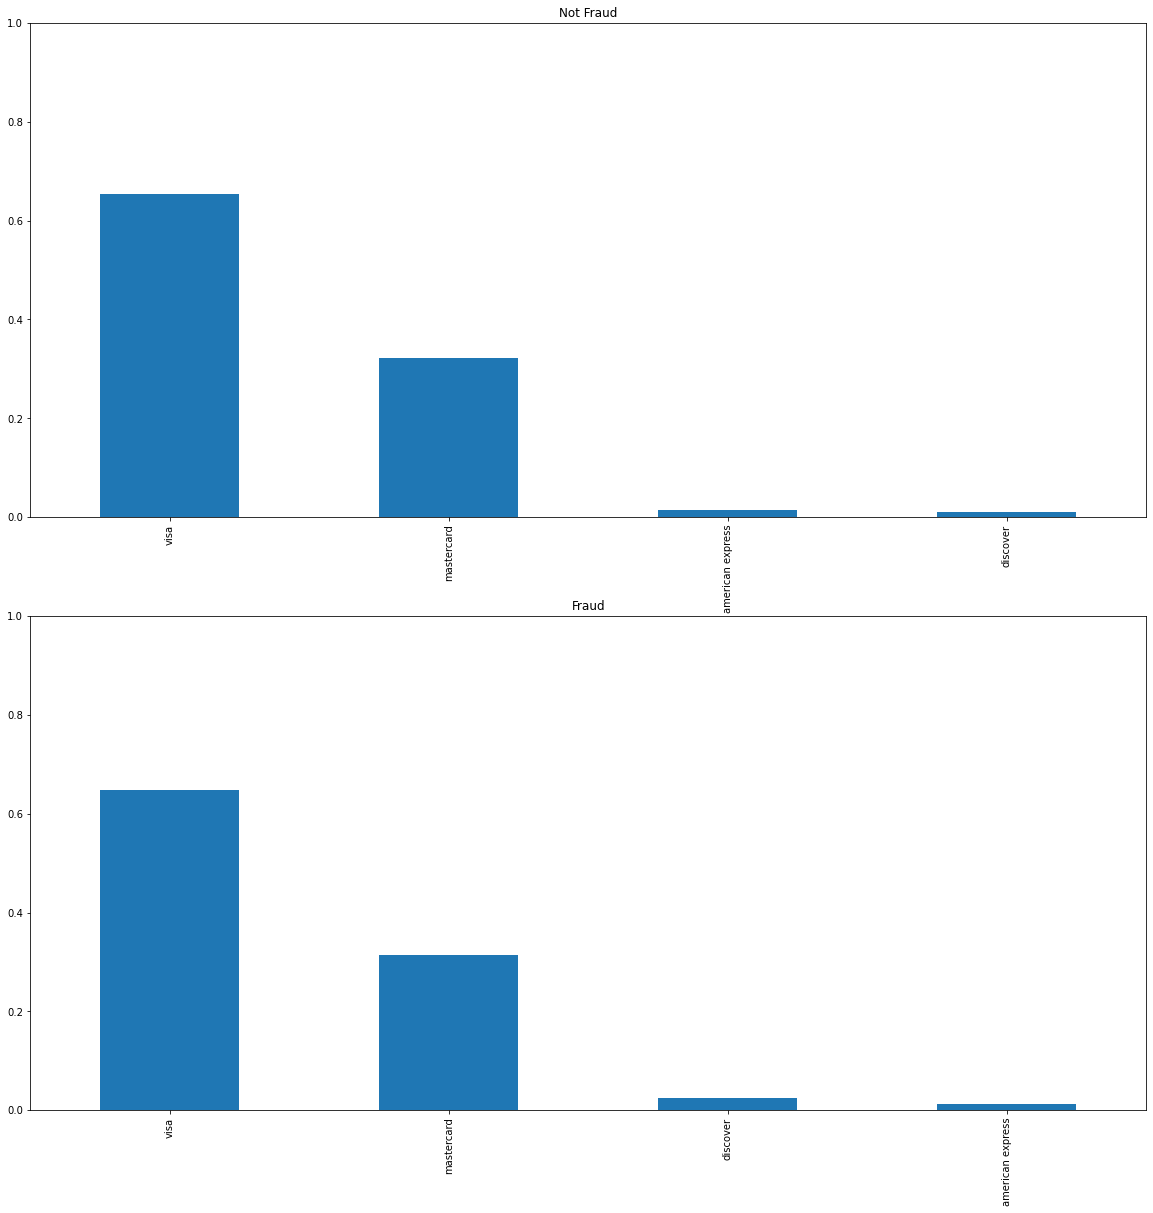

In [120]:
value_counts_by_fraud_status('card4', nrows=2, ncols=1, ylim=(0, 1), figsize=(20,20))

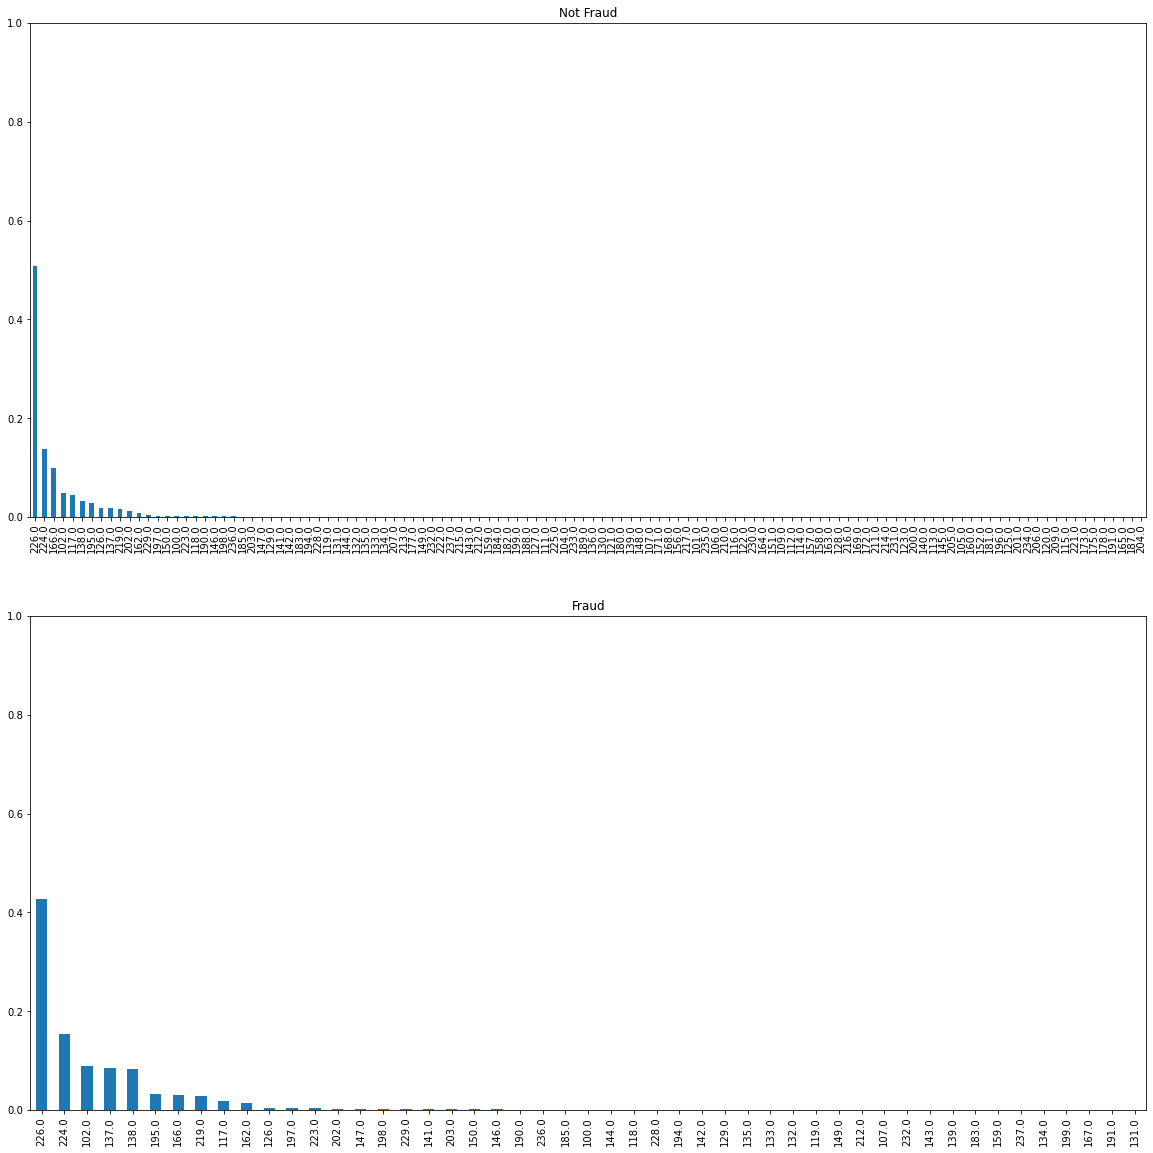

In [121]:
value_counts_by_fraud_status('card5', nrows=2, ncols=1, ylim=(0, 1), figsize=(20,20))

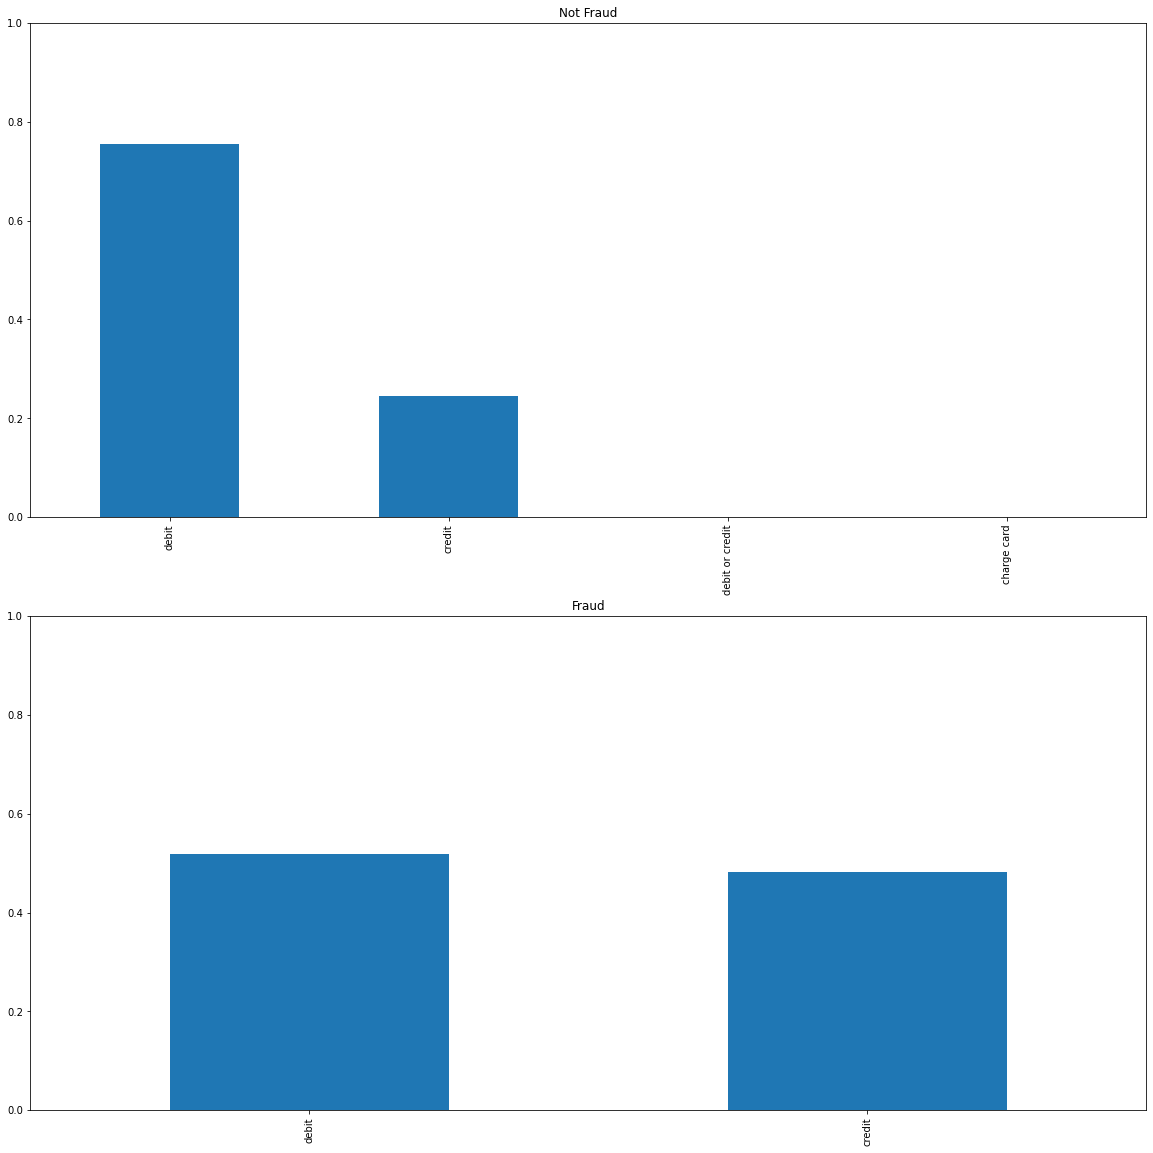

In [122]:
value_counts_by_fraud_status('card6', nrows=2, ncols=1, ylim=(0, 1), figsize=(20,20))

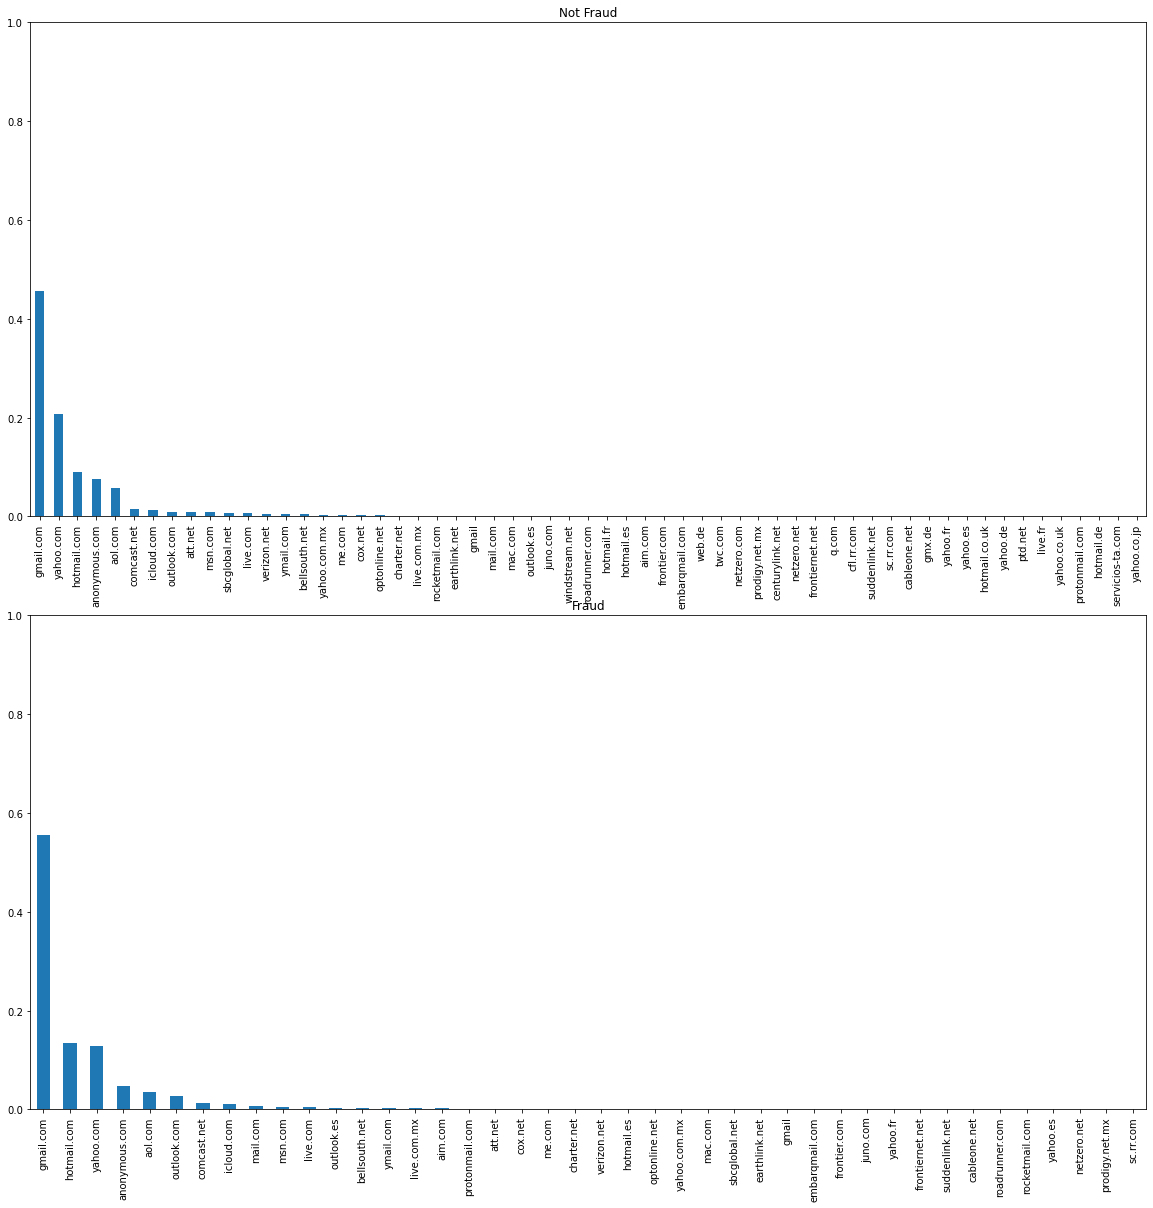

In [123]:
value_counts_by_fraud_status('P_emaildomain', nrows=2, ncols=1, ylim=(0, 1), figsize=(20,20))

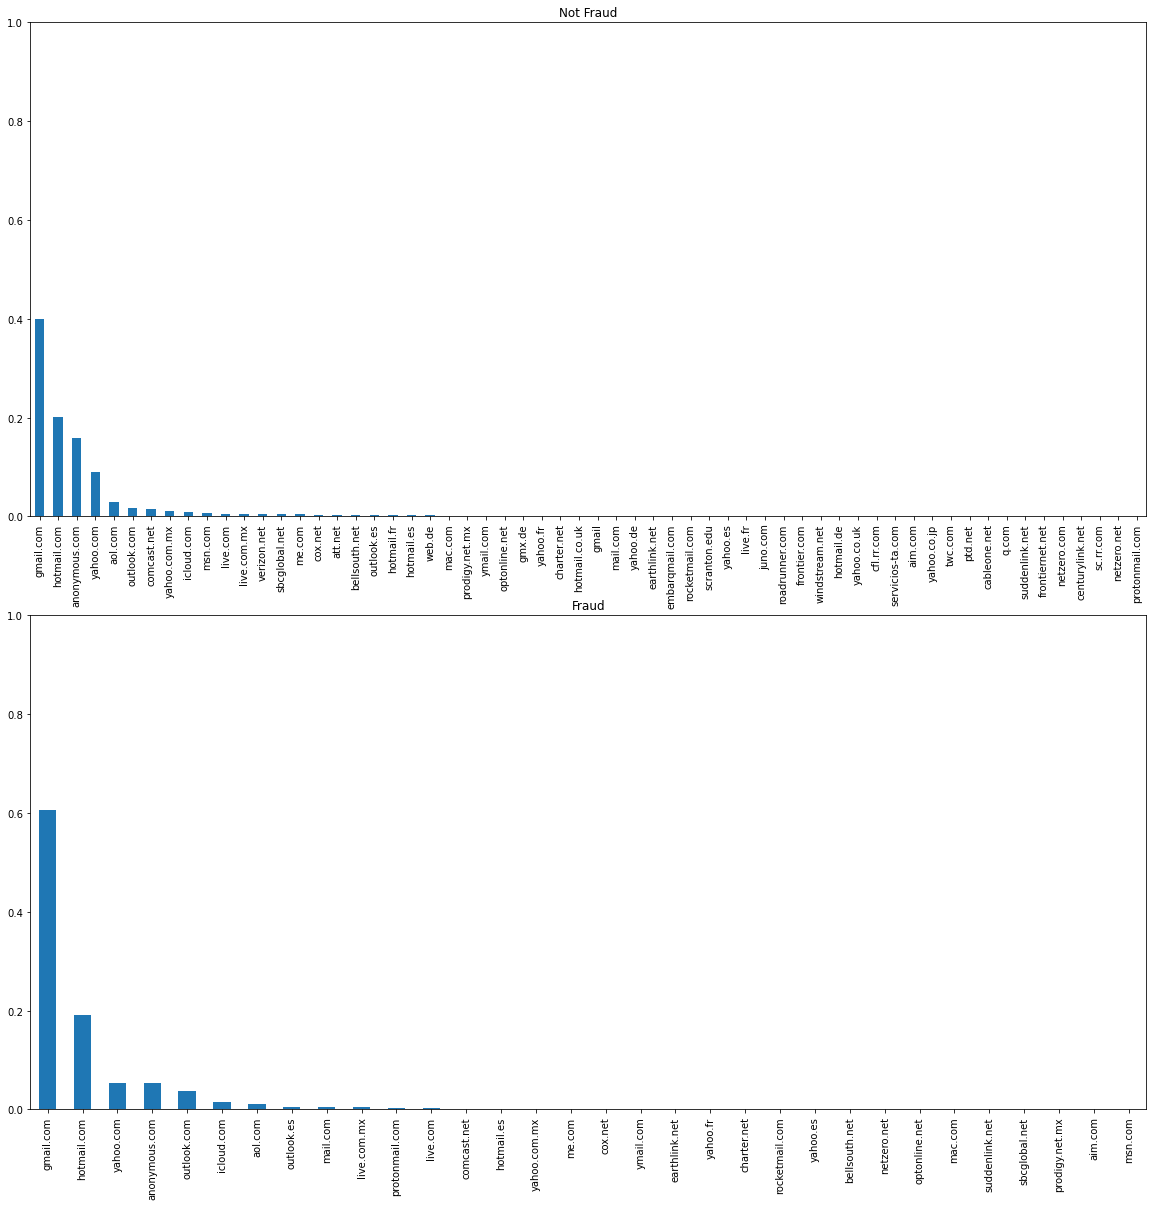

In [124]:
value_counts_by_fraud_status('R_emaildomain', nrows=2, ncols=1, ylim=(0, 1), figsize=(20,20))

In [ ]:
train['ProductCD'].value_counts().groupby

In [132]:
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
train['TransactionDT'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
test['TransactionDT'] = test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

Text(0.5, 1.0, 'Distribution of transaction dates')

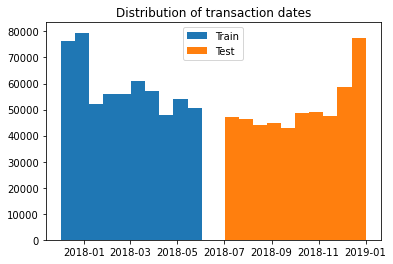

In [133]:
plt.hist(train['TransactionDT'], label='Train')
plt.hist(test['TransactionDT'], label='Test')
plt.legend()
plt.title('Distribution of transaction dates')

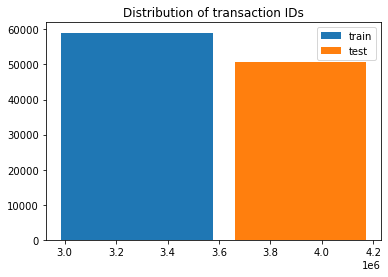

In [127]:
plt.hist(train['TransactionID'], label='train');
plt.hist(test['TransactionID'], label='test');
plt.legend();
plt.title('Distribution of transaction IDs');

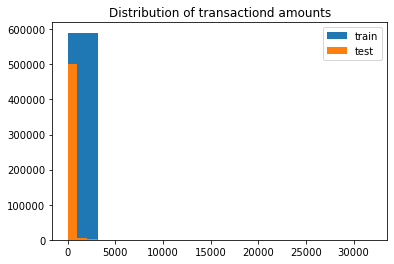

In [128]:
plt.hist(train['TransactionAmt'], label='train');
plt.hist(test['TransactionAmt'], label='test');
plt.legend();
plt.title('Distribution of transactiond amounts');

In [117]:
train.sort_values(by='isFraud', ascending=False).head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
374988,3361988,1,9345539,42.001,C,3901,176.0,185.0,mastercard,224.0,credit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,2.0,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,63.259701,63.259701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.259701,63.259701,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,158728.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,33.0,NaN,New,NotFound,225.0,NaN,380.0,561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome generic for android,NaN,NaN,NaN,F,F,T,F,mobile,Le X520 Build/IEXCNFN5902303111S
276475,32

In [118]:
train.sort_values(by='isFraud', ascending=False).tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
199455,3186455,0,4519758,23.553,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,1.0,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,21.291666,0.291666,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,208746.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,225.0,NaN,266.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 63.0,

In [20]:
train['TransactionAmt']

0          68.50
1          29.00
2          59.00
3          50.00
4          50.00
           ...  
590535     49.00
590536     39.50
590537     30.95
590538    117.00
590539    279.95
Name: TransactionAmt, Length: 590540, dtype: float64

In [12]:
train.groupby(by='isFraud').sum()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1870227844612,4194745567379,7.665510e+07,5648315587,203469704.0,86879290.0,112906571.0,148783814.0,44440934.0,27405226.0,7972331.0,7587885.0,8077028.0,3328.0,2105056.0,3261142.0,5007154.0,1434656.0,2599141.0,2610552.0,2691829.0,5555061.0,2022894.0,18700214.0,4684669.0,54798175.0,51908941.0,9174064.0,57977226.0,11734740.0,4754951.0,1555081.0,1.055761e+07,37967.727256,62912536.0,45103229.0,3161296.0,1064633.0,3196857.0,80823739.0,305130.0,318735.0,328289.0,258054.0,266853.0,318979.0,327074.0,313472.0,317449.0,143243.0,147877.0,281008.0,300422.0,497438.0,55483.0,55984.0,60627.0,61168.0,405099.0,420270.0,59400.0,60625.0,511625.0,523149.0,486508.0,491434.0,399.0,427.0,198057.0,207501.0,64751.0,65489.0,59329.0,63365.0,223902.0,238636.0,441578.0,459940.0,60526.0,63825.0,406698.0,57956.0,62144.0,428334.0,440325.0,414457.0,419750.0,160484.0,166510.0,61870.0,62485.0,66263.0,289401.0,310085.0,529184.0,553816.0,58524.0,60083.0,61717.0,65224.0,410710.0,428291.0,60134.0,65054.0,497118.0,487131.0,494676.0,274.0,198855.0,207871.0,64817.0,66554.0,63891.0,69108.0,266361.0,287186.0,519606.0,544572.0,59804.0,63227.0,66702.0,407701.0,424841.0,61058.0,66332.0,507033.0,521750.0,484622.0,452.0,199968.0,209201.0,66859.0,68591.0,60671.0,600632.0,1735628.0,992559.0,34461.0,513657.0,154623.0,517016.0,1059640.0,742920.0,48416.0,161316.0,94158.0,569335.0,571356.0,577174.0,573127.0,570106.0,571665.0,570567.0,573728.0,586884.0,577348.0,569614.0,570239.0,569805.0,569989.0,571926.0,570483.0,583886.0,619424.0,594894.0,7.493605e+07,1.929355e+08,1.168780e+08,4.837466e+06,5.239043e+07,1.729644e+07,6.000666e+07,1.180039e+08,8.419897e+07,9.834133e+06,2.211385e+07,1.502136e+07,2544.0,8

In [14]:
train.groupby(by='isFraud').mean()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.281810e+06,7.360791e+06,134.511665,9911.464381,362.453981,152.862034,199.542212,290.643341,86.813620,117.360098,235.199758,13.314952,14.173283,0.005840,3.693878,5.722537,8.786377,2.517484,4.560881,4.580904,4.723526,9.747825,3.549703,32.814474,8.220491,96.364705,171.956223,28.845357,142.432339,43.491155,72.629046,46.943007,157.343727,0.565846,126.396130,147.808201,55.345787,19.316574,58.152163,166.633142,0.999944,1.044529,1.075839,0.845671,0.874506,1.045329,1.071857,1.027282,1.040315,0.469423,0.484609,0.564623,0.603632,0.999492,0.111481,0.112487,0.121817,0.122904,0.813957,0.844440,0.119351,0.121813,1.027997,1.051152,0.977530,0.987428,0.000802,0.000858,0.397952,0.416927,0.130103,0.131586,0.119209,0.127318,0.550122,0.586323,1.084948,1.130063,0.148711,0.156817,0.999248,0.142397,0.152686,1.052407,1.081869,1.018312,1.031317,0.394306,0.409111,0.152013,0.153524,0.162807,0.581956,0.623550,1.064136,1.113668,0.117686,0.120821,0.124107,0.131159,0.825896,0.861250,0.120923,0.130817,0.999654,0.979571,0.994744,0.000551,0.399877,0.418008,0.130340,0.133833,0.128478,0.138969,0.549210,0.592150,1.071377,1.122854,0.123310,0.130368,0.137533,0.840640,0.875981,0.125896,0.136770,1.045453,1.075798,0.999243,0.000932,0.412315,0.431352,0.137857,0.141428,0.125098,1.054517,3.047207,1.742616,0.060502,0.901817,0.271468,0.907714,1.860388,1.304330,0.085003,0.283219,0.165311,0.999570,1.003118,1.013333,1.006227,1.000923,1.003661,1.001733,1.007283,1.030380,1.013638,1.000060,1.001157,1.000395,1.000718,1.004119,1.001585,1.025117,1.087510,1.044443,131.563693,338.732854,205.200301,8.493041,91.980813,30.366999,105.352467,207.176966,147.826416,17.265588,38.824830,26.372703,0.032492,1.031

In [15]:
train.groupby(by='isFraud').std()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,170754.780926,4.623930e+06,239.395078,4905.67237,157.726065,10.904432,41.046975,101.692564,2.607742,370.641879,536.798492,127.787969,147.485925,0.153208,65.839255,26.121841,68.689176,58.860773,91.023016,16.889451,91.239098,90.306569,82.601169,127.832166,47.898725,158.973258,177.773639,62.830058,192.213375,89.985719,147.600963,105.435756,237.987816,0.314576,183.710646,186.555365,127.166079,70.703174,137.532930,203.595694,0.007464,0.237326,0.314484,0.438623,0.471002,0.237727,0.302124,0.183936,0.222790,0.521856,0.552870,0.508471,0.528395,0.022541,0.318881,0.329104,0.338147,0.344751,0.425176,0.456660,0.327163,0.347641,0.192518,0.261379,0.183299,0.206031,0.029073,0.031653,0.513065,0.557192,0.344070,0.356108,0.32715,0.343634,0.515322,0.536893,0.480715,0.605612,0.413146,0.453107,0.027409,0.365600,0.407024,0.264426,0.346760,0.145434,0.190426,0.510969,0.545579,0.362182,0.376541,0.396980,0.509111,0.529922,0.382941,0.634752,0.333895,0.354333,0.365292,0.401378,0.433733,0.474493,0.342257,0.390062,0.018595,0.209554,0.233315,0.024142,0.515878,0.557105,0.350576,0.372346,0.350753,0.371890,0.512495,0.534486,0.437279,0.65411,0.358534,0.37784,0.415043,0.419453,0.463645,0.348039,0.399721,0.261994,0.339411,0.027498,0.032478,0.518220,0.564455,0.358622,0.382908,0.330855,21.410652,40.952917,28.194494,0.281261,2.74603,0.947877,20.951164,36.569617,26.144970,0.653947,3.426548,1.852491,0.020735,0.064075,0.117687,0.083539,0.044016,0.063399,0.049953,0.092617,0.180506,0.122735,0.030504,0.037059,0.03177,0.039766,0.065830,0.046801,0.177467,0.347368,0.240997,2388.479348,4311.400223,3062.462466,114.773011,315.485415,160.045517,2306.414902,3862.820432,2821.743297,298.301160,457.979

In [42]:
train.groupby(by='isFraud').count()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,569877,569877,569877,569877,569877,561367,568351,568341,565828,568345,511912,511912,233514,33896,478211,126064,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,568654,301873,318043,407051,269819,65469,33127,67099,67099,497741,305147,57119,55115,54974,485040,313098,313098,313098,293660,232489,412488,239458,239471,239471,305147,305147,305147,305147,305147,305147,305147,305147,305147,305147,305147,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,78295,78295,78295,78295,78295,78300,78300,78300,78295,78295,78295,78295,78300,78300,78300,78295,78295,78295,78295,78295,7829

In [58]:
train_nulls = train.isnull().drop('isFraud', axis=1)
train_nulls['isFraud'] = train['isFraud']

In [91]:
train_nulls.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,Fals

In [61]:
train_nulls.groupby(by='isFraud').mean()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.014933,0.002678,0.002695,0.007105,0.002688,0.101715,0.101715,0.590238,0.940520,0.160852,0.778787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002146,0.470284,0.441909,0.285721,0.526531,0.885117,0.941870,0.882257,0.882257,0.126582,0.464539,0.89977,0.903286,0.903534,0.148869,0.450587,0.450587,0.450587,0.484696,0.592037,0.276181,0.579808,0.579785,0.579785,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0

In [105]:
train_nulls.groupby(by='isFraud').std()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.121285,0.051678,0.051846,0.083992,0.051779,0.302273,0.302273,0.491790,0.236520,0.367395,0.415064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046276,0.499117,0.496614,0.451758,0.499296,0.318881,0.233989,0.322304,0.322304,0.332504,0.498741,0.300307,0.295568,0.29523,0.355960,0.497553,0.497553,0.497553,0.499766,0.491457,0.447108,0.49359,0.493594,0.493594,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

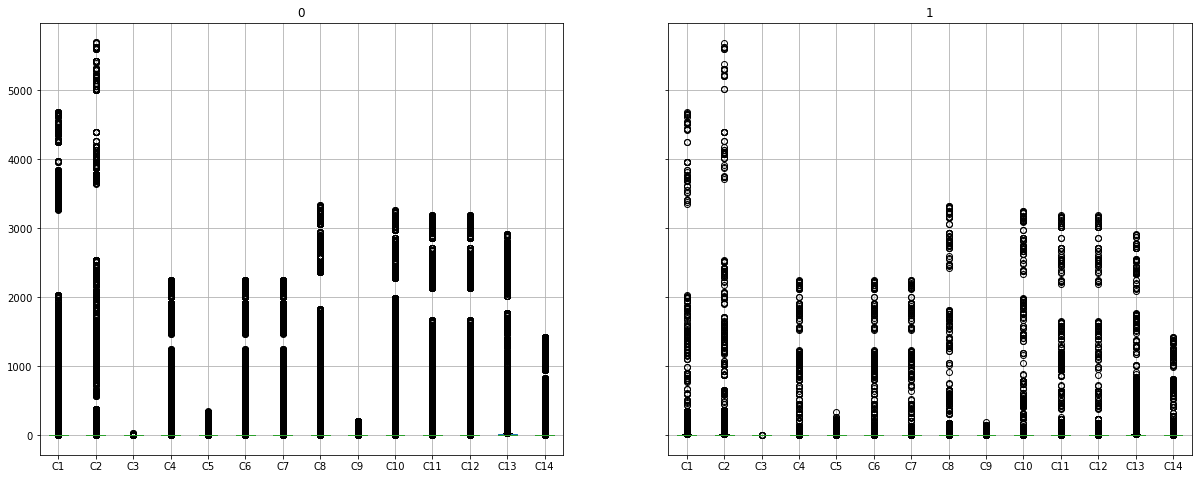

In [21]:
train.groupby(by='isFraud').boxplot(column=['C'+f'{i+1}' for i in range(14)], 
                                    figsize=(20,8))

<AxesSubplot:>

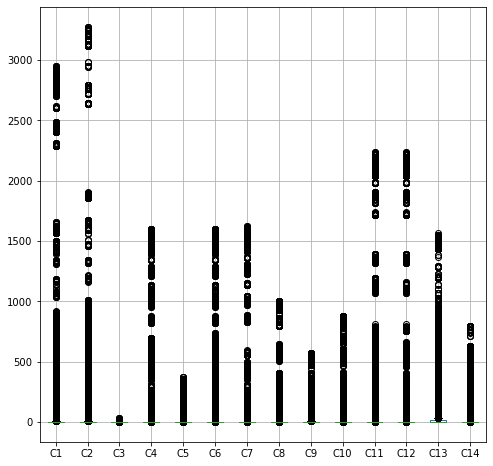

In [31]:
test.boxplot(column=['C'+f'{i+1}' for i in range(14)], figsize=(8,8))

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

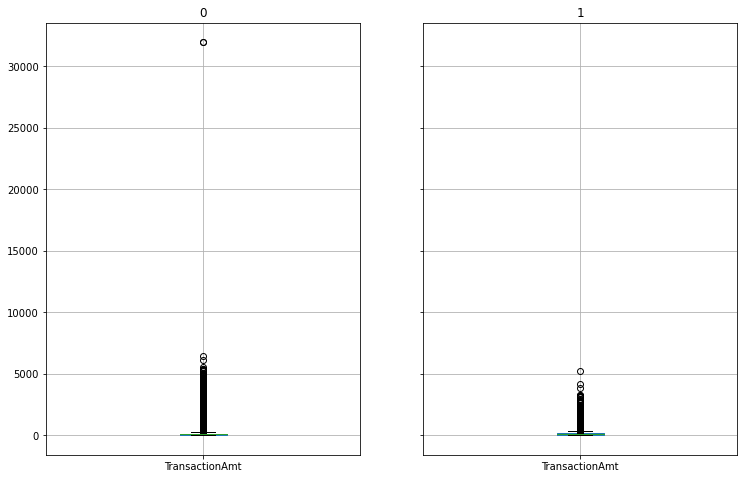

In [114]:
train.groupby(by='isFraud').boxplot(column=['TransactionAmt'], 
                                    figsize=(12,8))

In [ ]:
train.groupby(by='isFraud').boxplot(column=['TransactionAmt'], 
                                    figsize=(12,8))

In [ ]:
train_nulls.groupby(by='isFraud').aggregate

## Creating simplified data sets for  experimentation

### Random sampling of the test set

Now I will create take a sample of this dataset to work with during experimentation.

In [18]:
# randomly sample the date without replacement
train_s = train.sample(frac=0.1, axis=0)   

In [19]:
assert train_s.columns.shape[0]==train.columns.shape[0] 

In [20]:
train_s.to_csv(path/'train_s.csv')

### Simplfication of data set

In [21]:
# train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)
# test = pd.read_csv(path/'test.csv', index_col=[0], low_memory=False)

In [23]:
train_s.shape, test.shape

((59054, 434), (506691, 433))

In [15]:
train_s.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

To simplify the dataset I will drop every collumn that records a Vxxx feature. There are over 339 such features many of which are highkly correllated.

In [16]:
train_ss = train_s.drop(list(train_s.filter(regex = 'V')), axis = 1)

In [17]:
assert len(train_ss.columns)==len(train_s.columns) - 339

In [18]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [19]:
train_ss.to_csv(path/'train_ss.csv')